## 1. Definition of the Business Problem

This is the foundation of the project. In this stage, we translate a company’s need into a clear objective for Data Science. We define what we want to solve (for example, automating the classification of product reviews), why it is important (to reduce costs, speed up decision-making), and how success will be measured.

### Definition

An e-commerce company wants to automate the analysis of customer feedback. Currently, the analysis is done manually, which is a slow, expensive process that doesn’t scale with the increasing volume of reviews received daily.

### Objective

Build a Machine Learning model that automatically classifies product reviews as ‘positive’ or ‘negative’.

### Expected Benefits

Efficiency: Reduce the time and cost of feedback analysis.

Fast Decision-Making: Allow product and marketing teams to quickly identify products with issues or opportunities for improvement.

Prioritization: Direct negative reviews to the customer support team with higher priority, improving the overall customer experience.

## 2. Importing the Packages

In [3]:
# Install watermark package
!pip install -q -U watermark

In [4]:
!pip install -U scikit-learn


In [12]:
# Data manipulation and visualization
import re
import pandas as pd
import numpy as np
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing and Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


In [6]:
# View Configuration
sns.set_style('whitegrid')
%matplotlib inline

In [7]:
%reload_ext watermark
%watermark -a "Eduardo Data Science"

Author: Eduardo Data Science



In [8]:
%watermark --iversions

joblib    : 1.5.2
seaborn   : 0.13.2
numpy     : 2.3.4
sklearn   : 1.7.2
matplotlib: 3.10.7
re        : 2.2.1
pandas    : 2.3.1



# Loading and Undestanding dataset

In [16]:
dataset = 'sentiment.csv'

In [22]:
# Loading and understanding data
df_dse = pd.read_csv(dataset, encoding="latin-1")

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_2868\3137060405.py:2: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dse = pd.read_csv(dataset, encoding="latin-1")


In [23]:
# Shape
df_dse.shape

(171380, 6)

significa que:
-171.380 linhas → cada linha é um registro.
-6 colunas → são as variáveis que descrevem cada review.

In [24]:
# First lines
df_dse.head()

,ProductName,ProductPrice,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,Super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,Awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,Fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,Useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,Fair,ok ok product,neutral


ProductPrice and Rate are numeric, the rest is text

Text pattern Some reviews have short words (“Super!”, “Nice”), others long sentences — preprocessing will need to normalize this

In [30]:
# sample dataset
df_dse.sample(10)

,ProductName,ProductPrice,Rate,Review,Summary,Sentiment
136341,HP 680 Black Ink Cartridge,852.0,5.0,Brilliant,good,positive
108945,NIVIA Storm Football - Size: 5ÃÂÃÂ®ÃÂÃÂ ...,429,5,Mind-blowing purchase,very nice product,positive
110595,Men Black Sandal,299,1,Nan,with in two days it s got damaged,negative
169138,KENT Ace 8 L RO UV UF TDS Water Purifier wi...,14299.0,3.0,Does the job,product is spurb installation guy has charge 1...,negative
72937,Crompton 75 L Desert Air Cooler??????????(Whit...,10499,1,don't waste your money,bad product do not purchase this this is so ba...,negative
133004,MarQ by Flipkart 18-Litre 18L1200W4HL Oven Toa...,2499.0,5.0,Terrific,awesome,positive
20792,Atomberg Renesa 1200 mm BLDC Motor with Remote...,3569,5,Fabulous!,good speed n unique look with remote,positive
163527,MOTOROLA 8 kg Smart Wi-Fi Enabled Inverter Tec...,16990.0,5.0,Excellent,good,positive
104885,Urban Terrain Denver with Complete Accessories...,6719,5,Perfect product!,really nice to have thing,positive
24200,PHILIPS HR7627/00 650 W Food Processor????????...,4319,1,Unsatisfactory,ridiculous my return request was delayed and i...,negative


### 4. Exploratory Data Analysis (EDA)

In [32]:
# Info
df_dse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171380 entries, 0 to 171379
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ProductName   171380 non-null  object
 1   ProductPrice  171379 non-null  object
 2   Rate          171379 non-null  object
 3   Review        171379 non-null  object
 4   Summary       171379 non-null  object
 5   Sentiment     171379 non-null  object
dtypes: object(6)
memory usage: 7.8+ MB


-Data type: all object (i.e. text/string)

-Tipo de dados: todos os objetos (por exemplo, texto/string)

In [34]:
print("\nChecking for missing values:\n")
print(df_dse.isnull().sum())


Checking for missing values:

ProductName     0
ProductPrice    1
Rate            1
Review          1
Summary         1
Sentiment       1
dtype: int64



Distribution of Feelings:



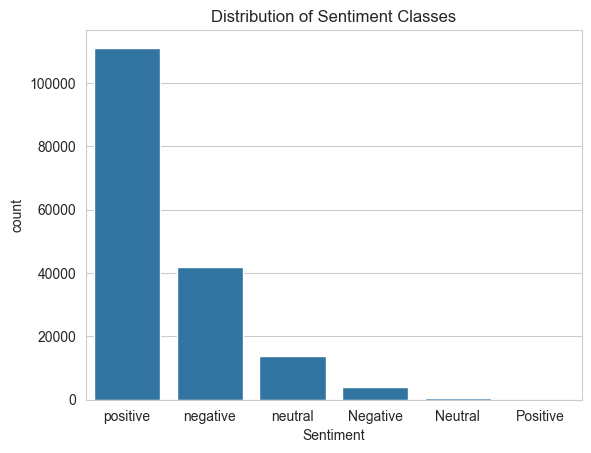

In [37]:
print("\nDistribution of Feelings:\n")
sns.countplot(x='Sentiment', data=df_dse)
plt.title('Distribution of Sentiment Classes')
plt.show()
